# Machine Learning Ex5
### author: Josef Lorenz Rumberger


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
%matplotlib inline

Lowest RSS is 361.307370639 , reached with a polynomial of grade 13


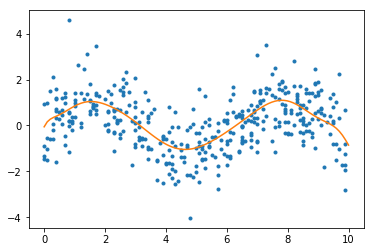

In [0]:
# Prepare data
X = np.random.randint(0, 100, 2000)*0.1
y = np.sin(X)+ np.random.normal(0,1,2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_RSS = 100000000
best_para = 0
# fit polynomial regressions
for i in range(0, 30):
    z, res, _, _, _ = np.polyfit(X_train,y_train,i, full=True)
    p = np.poly1d(z)
    RSS = np.sum((p(X_test)-y_test)**2)
    if RSS < best_RSS:
        best_RSS = RSS
        best_para = i
print("Lowest RSS is", best_RSS,", reached with a polynomial of grade", best_para)

z, res, _, _, _ = np.polyfit(X_train,y_train,best_para, full=True)
p = np.poly1d(z)
xp = np.linspace(0, 10, 100)
plt.plot(X_test,y_test, '.',xp, p(xp), '-')



Lowest RSS is 408.795237486 , reached with a gamma of 0.17


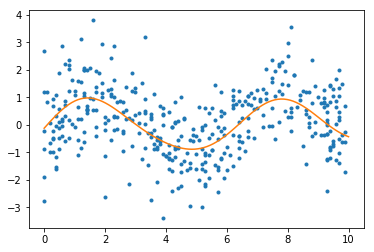

In [0]:
X = np.random.randint(0, 100, 2000)*0.1
y = np.sin(X)+ np.random.normal(0,1,2000)
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit rbf-kernel ridge regressions
best_RSS = 10000
best_para = 0
for i in range(0, 100):
    clf = KernelRidge(alpha=0.2, kernel='rbf', gamma=i*0.01, kernel_params=None)
    clf.fit(X_train, y_train) 
    p = clf.predict(X_test)
    RSS = np.sum((p-y_test)**2)
    if RSS < best_RSS:
        best_RSS = RSS
        best_para = i*0.01
print("Lowest RSS is", best_RSS,", reached with a gamma of", best_para)

clf =  KernelRidge(alpha=0.2, kernel='rbf', gamma=best_para, kernel_params=None)
clf.fit(X_train, y_train)
z = clf.predict(X_test)
xp = np.linspace(0, 10, 100).reshape(-1, 1)
plt.plot(X_test,y_test, '.',xp, clf.predict(xp), '-')

